lastfm_K2_I1	[0.7080498072172127, 2849.4917655589798]


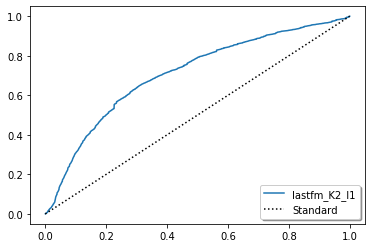

In [2]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


folder = "190718_2"
datasetname = "lastfm"
time_str = ""
sss = [datasetname+"_K2_I1",]

repeated = 0
index = 0
for filename in sss:
    full_path = "D:/Research/Project/LDA/results/"+folder+"/"+datasetname+"/" + filename + ".csv"
    ranks = pd.read_csv(full_path, index_col=0)
    max_rank = max(ranks['rank'].values)
    
    rank_plot = ranks[ranks['repeated'] == repeated]
    num_record = len(rank_plot['rank'])
    
    unique, counts = np.unique(rank_plot['rank'].values, return_counts=True)
    if unique[-1] != max_rank:
        unique = np.concatenate([unique, [max_rank]])
        counts = np.concatenate([counts, [0]])
    cum_counts = np.cumsum(counts) / num_record
    
    auc = 0.0
    prev_value = [0, 0]
    for value in zip(unique / max_rank, cum_counts):
        if prev_value[0] != 0:
            s = (value[1] + prev_value[1]) / 2 * (value[0] - prev_value[0])
            auc += s
        prev_value = value
    
    plt.plot(unique / max_rank, cum_counts, label=sss[index])
    print(sss[index] + "\t" + str([auc, np.mean(rank_plot['rank'].values)]))
    index += 1

plt.plot([0.0, 1.0], [0.0, 1.0], label="Standard", linestyle=':', color='black')

legend = plt.legend(loc='lower right', shadow=True, fontsize='medium')
plt.show()

# post_fix = "_" + str(repeated)
# plt.savefig("D:/Research/Project/LDA/figure/"+folder+"/"+datasetname+ post_fix +".png",
#             dpi=300)